# Carregando os dados

In [1]:
import pandas as pd
import numpy as np

def load_data(data_path: str) -> pd.DataFrame:
    data = pd.read_csv(data_path)
    return data

df = load_data("../data/ames.csv")

df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Escolhendo features de interesse (15)

#### Usamos o site "American Statistical Association" para entender melhor o que cada coluna significa
##### link (https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


- As features escolhidas foram:

    - Numéricas:
        - Gr.Liv.Area
        - Garage.Cars
        - Total.Bsmt.SF
        - Mas.Vnr.Area
        - Fireplaces
        - BsmtFin.SF.1
        - Lot.Frontage
        - Lot.Area
        - TotRms.AbvGrd
        - Year.Remod.Add   
        - X1st.Flr.SF    
        - X2nd.Flr.SF     
        - Bsmt.Full.Bath   
        - Bsmt.Half.Bath   
        - Full.Bath    
        - Half.Bath       

    - Categóricas:
        - Neighborhood
        - Overall.Qual
        - House.Style
        - Foundation

### Note que escolhemos mais de 15 features, mas vamos combinar algumas delas na seção "Feature Engineering"

## Features com correlações maiores ao nosso target são mais importantes para o modelo

### vamos analisar quais são:

In [2]:
top_correlation_features = df.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False).head(25)
top_correlation_features

SalePrice         1.000000
Overall.Qual      0.799262
Gr.Liv.Area       0.706780
Garage.Cars       0.647877
Garage.Area       0.640401
Total.Bsmt.SF     0.632280
X1st.Flr.SF       0.621676
Year.Built        0.558426
Full.Bath         0.545604
Year.Remod.Add    0.532974
Garage.Yr.Blt     0.526965
Mas.Vnr.Area      0.508285
TotRms.AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin.SF.1      0.432914
Lot.Frontage      0.357318
Wood.Deck.SF      0.327143
Open.Porch.SF     0.312951
Half.Bath         0.285056
Bsmt.Full.Bath    0.276050
X2nd.Flr.SF       0.269373
Lot.Area          0.266549
Bsmt.Unf.SF       0.182855
Bedroom.AbvGr     0.143913
Screen.Porch      0.112151
Name: SalePrice, dtype: float64

In [3]:
def filter_data(df: pd.DataFrame) -> pd.DataFrame:
    selected_features = [

        # Numéricas:
        "Gr.Liv.Area",
        "Garage.Cars",
        "Total.Bsmt.SF",
        "Mas.Vnr.Area",
        "Fireplaces",
        "BsmtFin.SF.1",
        "Lot.Frontage",
        "Lot.Area",
        "TotRms.AbvGrd",
        "Year.Remod.Add",   
        "X1st.Flr.SF",     
        "X2nd.Flr.SF",     
        "Bsmt.Full.Bath",   
        "Bsmt.Half.Bath",   
        "Full.Bath",       
        "Half.Bath",       

        # Categóricas:
        "Neighborhood",
        "Overall.Qual",
        "House.Style",
        "Foundation",
        
        # target:
        "SalePrice"
    ]
    
    filtered_df = df[selected_features]
    
    return filtered_df


df = filter_data(df)

df.head()

,Gr.Liv.Area,Garage.Cars,Total.Bsmt.SF,Mas.Vnr.Area,Fireplaces,BsmtFin.SF.1,Lot.Frontage,Lot.Area,TotRms.AbvGrd,Year.Remod.Add,...,X2nd.Flr.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Neighborhood,Overall.Qual,House.Style,Foundation,SalePrice
0,1656,2.0,1080.0,112.0,2,639.0,141.0,31770,7,1960,...,0,1.0,0.0,1,0,NAmes,6,1Story,CBlock,215000
1,896,1.0,882.0,0.0,0,468.0,80.0,11622,5,1961,...,0,0.0,0.0,1,0,NAmes,5,1Story,CBlock,105000
2,1329,1.0,1329.0,108.0,0,923.0,81.0,14267,6,1958,...,0,0.0,0.0,1,1,NAmes,6,1Story,CBlock,172000
3,2110,2.0,2110.0,0.0,2,1065.0,93.0,11160,8,1968,...,0,1.0,0.0,2,1,NAmes,7,1Story,CBlock,244000
4,1629,2.0,928.0,0.0,1,791.0,74.0,13830,6,1998,...,701,0.0,0.0,2,1,Gilbert,5,2Story,PConc,189900


# Feature engineering 

In [4]:
from datetime import datetime

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy() 
    
    # 2025 :)
    current_year = datetime.now().year 
    df['Years.Snc.Remod'] = current_year - df['Year.Remod.Add']
    

    df['Total.SF'] = df['Total.Bsmt.SF'].fillna(0) + \
                     df['X1st.Flr.SF'].fillna(0) + \
                     df['X2nd.Flr.SF'].fillna(0)
    
    
    df['Total.Bath'] = df['Bsmt.Full.Bath'].fillna(0) + \
                       (0.5 * df['Bsmt.Half.Bath'].fillna(0)) + \
                       df['Full.Bath'].fillna(0) + \
                       (0.5 * df['Half.Bath'].fillna(0))
    

    columns_to_drop = [
        'Year.Remod.Add',
        'Total.Bsmt.SF',
        'X1st.Flr.SF',
        'X2nd.Flr.SF',
        'Bsmt.Full.Bath',
        'Bsmt.Half.Bath',
        'Full.Bath',
        'Half.Bath',
    ]
    
    # Remove as colunas originais
    df = df.drop(columns=columns_to_drop)
    
    return df

df = feature_engineering(df)
df.head()

,Gr.Liv.Area,Garage.Cars,Mas.Vnr.Area,Fireplaces,BsmtFin.SF.1,Lot.Frontage,Lot.Area,TotRms.AbvGrd,Neighborhood,Overall.Qual,House.Style,Foundation,SalePrice,Years.Snc.Remod,Total.SF,Total.Bath
0,1656,2.0,112.0,2,639.0,141.0,31770,7,NAmes,6,1Story,CBlock,215000,65,2736.0,2.0
1,896,1.0,0.0,0,468.0,80.0,11622,5,NAmes,5,1Story,CBlock,105000,64,1778.0,1.0
2,1329,1.0,108.0,0,923.0,81.0,14267,6,NAmes,6,1Story,CBlock,172000,67,2658.0,1.5
3,2110,2.0,0.0,2,1065.0,93.0,11160,8,NAmes,7,1Story,CBlock,244000,57,4220.0,3.5
4,1629,2.0,0.0,1,791.0,74.0,13830,6,Gilbert,5,2Story,PConc,189900,27,2557.0,2.5


# Remoção de anomalias e outliers

### Nota: 

#### Por conta da análise contida no site "American Statistical Association" citado anteriormente, tivemos uma dica de onde procurar por outliers. A partir disso, fomos atrás de outras formas de detectar esses outliers para evidenciar nosso conhecimento :)

#### Análise de "American Statistical Association":
"SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."
    



In [6]:
import plotly.express as px


fig = px.scatter(df, x='Gr.Liv.Area', y='SalePrice')
fig.update_traces(marker=dict(size=5, opacity=0.5))
fig.update_layout(title='SalePrice vs Gr.Liv.Area',
                  xaxis_title='Gr.Liv.Area',
                  yaxis_title='SalePrice')
fig.add_shape(type="line",
                x0=4000, y0=0, x1=4000, y1=df['SalePrice'].max(),
                line=dict(color="red", width=1, dash="dash"))
fig.add_annotation(text="Threshold at 4000", x=4000, y=df['SalePrice'].max(), showarrow=True, arrowhead=2)

fig.show()

### Sabendo disso, vamos analisar as correlações de SalePrice com nossas features e plotar as que mais se correlacionam para ver se achamos outliers assim

In [7]:
df.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False).head(3)

SalePrice       1.000000
Overall.Qual    0.799262
Total.SF        0.793127
Name: SalePrice, dtype: float64

In [8]:
fig = px.scatter(df, x='Overall.Qual', y='SalePrice')
fig.update_traces(marker=dict(size=5, opacity=0.5))
fig.update_layout(title='SalePrice vs Overall.Qual',
                  xaxis_title='Overall.Qual',
                  yaxis_title='SalePrice')

# plot square at 200k 
fig.add_shape(type="rect",
                x0=8.9, y0=0, x1=10.1, y1=250000,
                line=dict(color="red", width=1, dash="dash"),
                fillcolor="rgba(255, 0, 0, 0.2)")

fig.show()

### Como pudemos ver, temos casas muito bem avaliadas (9 e 10), com preços muito baixos que fogem da distribuição normal

In [9]:
fig = px.scatter(df, x='Total.SF', y='SalePrice')
fig.update_traces(marker=dict(size=5, opacity=0.5))
fig.update_layout(title='SalePrice vs Total.SF',
                  xaxis_title='Total.SF',
                  yaxis_title='SalePrice')
fig.add_shape(type="line",
                x0=7000, y0=0, x1=7000, y1=df['SalePrice'].max(),
                line=dict(color="red", width=1, dash="dash"))
fig.add_annotation(text="Threshold at 7000", x=7000, y=df['SalePrice'].max(), showarrow=True, arrowhead=2)

fig.show()

### Aqui tambem está bem estranho, casas enormes com preço de banana?!? 

## Vamos tirar esses outliers para que não afetem nosso modelo preditivo

In [10]:
def drop_outliers(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
   
    items_to_drop = df[(df["SalePrice"] < 200000) & (df["Overall.Qual"] > 8) & (df["Total.SF"] > 7000)]
    df = df.drop(items_to_drop.index)
    
    return df

### DataFrame ANTES da remoção de outliers:

In [11]:
df.describe()

,Gr.Liv.Area,Garage.Cars,Mas.Vnr.Area,Fireplaces,BsmtFin.SF.1,Lot.Frontage,Lot.Area,TotRms.AbvGrd,Overall.Qual,SalePrice,Years.Snc.Remod,Total.SF,Total.Bath
count,2930.000000,2929.000000,2907.000000,2930.000000,2929.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1499.690444,1.766815,101.896801,0.599317,442.629566,69.224590,10147.921843,6.443003,6.094881,180796.060068,40.733447,2546.269283,2.217918
std,505.508887,0.760566,179.112611,0.647921,455.590839,23.365335,7880.017759,1.572964,1.411026,79886.692357,20.860286,804.350838,0.807444
min,334.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1300.000000,2.000000,1.000000,12789.000000,15.000000,334.000000,1.000000
25%,1126.000000,1.000000,0.000000,0.000000,0.000000,58.000000,7440.250000,5.000000,5.000000,129500.000000,21.000000,2000.000000,1.500000
50%,1442.000000,2.000000,0.000000,1.000000,370.000000,68.000000,9436.500000,6.000000,6.000000,160000.000000,32.000000,2450.000000,2.000000
75%,1742.750000,2.000000,164.000000,1.000000,734.000000,80.000000,11555.250000,7.000000,7.000000,213500.000000,60.000000,2990.000000,2.500000
max,5642.000000,5.000000,1600.000000,4.000000,5644.000000,313.000000,215245.000000,15.000000,10.000000,755000.000000,75.000000,11752.000000,7.000000


In [12]:
from plotly.subplots import make_subplots

fig1_px = px.scatter(df, x='Gr.Liv.Area', y='SalePrice')
fig1_px.update_traces(marker=dict(size=5, opacity=0.5))


fig2_px = px.scatter(df, x='Total.SF', y='SalePrice')
fig2_px.update_traces(marker=dict(size=5, opacity=0.5))

fig_subplots = make_subplots(
    rows=1, cols=2,
    subplot_titles=('SalePrice vs Gr.Liv.Area', 'SalePrice vs Total.SF')
)


fig_subplots = make_subplots(
    rows=1, cols=2,
    subplot_titles=('SalePrice vs Gr.Liv.Area', 'SalePrice vs Total.SF')
)


for trace in fig1_px.data:
    fig_subplots.add_trace(trace, row=1, col=1)


for trace in fig2_px.data:
    fig_subplots.add_trace(trace, row=1, col=2)

fig_subplots.update_xaxes(title_text='Gr.Liv.Area', row=1, col=1)
fig_subplots.update_yaxes(title_text='SalePrice', row=1, col=1)


fig_subplots.update_xaxes(title_text='Total.SF', row=1, col=2)
fig_subplots.update_yaxes(title_text='SalePrice', row=1, col=2) 


fig_subplots.update_layout(
    height=600, 
    width=1200, 
    showlegend=False 
)


fig_subplots.show()

### DataFrame DEPOIS da remoção de outliers:

In [13]:
df = drop_outliers(df)
df.describe()

,Gr.Liv.Area,Garage.Cars,Mas.Vnr.Area,Fireplaces,BsmtFin.SF.1,Lot.Frontage,Lot.Area,TotRms.AbvGrd,Overall.Qual,SalePrice,Years.Snc.Remod,Total.SF,Total.Bath
count,2927.000000,2926.000000,2904.000000,2927.000000,2926.000000,2437.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,1495.961736,1.765892,101.044077,0.597882,439.011620,69.075503,10109.374786,6.436625,6.090878,180800.770755,40.758114,2538.713017,2.215750
std,491.993241,0.760260,177.098747,0.646169,439.355775,22.787266,7782.875751,1.560140,1.406195,79926.657275,20.856725,767.575344,0.804975
min,334.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1300.000000,2.000000,1.000000,12789.000000,15.000000,334.000000,1.000000
25%,1126.000000,1.000000,0.000000,0.000000,0.000000,58.000000,7439.000000,5.000000,5.000000,129500.000000,21.000000,2000.000000,1.500000
50%,1442.000000,2.000000,0.000000,1.000000,370.000000,68.000000,9430.000000,6.000000,6.000000,160000.000000,32.000000,2448.000000,2.000000
75%,1741.000000,2.000000,164.000000,1.000000,734.000000,80.000000,11523.000000,7.000000,7.000000,213500.000000,60.000000,2988.500000,2.500000
max,4476.000000,5.000000,1600.000000,4.000000,2288.000000,313.000000,215245.000000,14.000000,10.000000,755000.000000,75.000000,6872.000000,7.000000


In [14]:

fig1_px = px.scatter(df, x='Gr.Liv.Area', y='SalePrice')
fig1_px.update_traces(marker=dict(size=5, opacity=0.5))


fig2_px = px.scatter(df, x='Total.SF', y='SalePrice')
fig2_px.update_traces(marker=dict(size=5, opacity=0.5))

fig_subplots = make_subplots(
    rows=1, cols=2,
    subplot_titles=('SalePrice vs Gr.Liv.Area', 'SalePrice vs Total.SF')
)


fig_subplots = make_subplots(
    rows=1, cols=2,
    subplot_titles=('SalePrice vs Gr.Liv.Area', 'SalePrice vs Total.SF')
)


for trace in fig1_px.data:
    fig_subplots.add_trace(trace, row=1, col=1)


for trace in fig2_px.data:
    fig_subplots.add_trace(trace, row=1, col=2)

fig_subplots.update_xaxes(title_text='Gr.Liv.Area', row=1, col=1)
fig_subplots.update_yaxes(title_text='SalePrice', row=1, col=1)


fig_subplots.update_xaxes(title_text='Total.SF', row=1, col=2)
fig_subplots.update_yaxes(title_text='SalePrice', row=1, col=2) 


fig_subplots.update_layout(
    height=600, 
    width=1200, 
    showlegend=False 
)


fig_subplots.show()

# Lidando com dados faltantes

### Existem algumas abordagens para lidar com dados faltantes, o ideal seria ter o entendimento completo do dataset para saber se são dados que foram adicionados de forma incorreta. 

### por exemplo:  se em casas que não tem porão tiverem NaN ao invés de 0 nas fetures relacionadas ao porão 

### Ou se realmente estão faltantes e não se sabe a informação.


## Para tentar entender melhor nossas features, vamos analisar a porcentagem de dados faltantes em cada uma para ver se estamos trabalhando com dados minimamente satisfatórios.




In [15]:
import pandas as pd

def get_missing_percentage(df: pd.DataFrame) -> pd.DataFrame:

  missing_percentage = df.isnull().sum() * 100 / len(df)

  missing_df = pd.DataFrame({'Feature': df.columns, 'missing %': missing_percentage})

  missing_df = missing_df.sort_values('missing %', ascending=False).reset_index(drop=True)

  return missing_df

missing_percentage_before = get_missing_percentage(df)

missing_percentage_before

,Feature,missing %
0,Lot.Frontage,16.740690
1,Mas.Vnr.Area,0.785787
2,BsmtFin.SF.1,0.034165
3,Garage.Cars,0.034165
4,Fireplaces,0.000000
5,Gr.Liv.Area,0.000000
6,Lot.Area,0.000000
7,TotRms.AbvGrd,0.000000
8,Neighborhood,0.000000
9,Overall.Qual,0.000000


### Como temos poucas features com dados faltantes, conseguimos analisar melhor como lidar com cada uma delas

In [16]:
# Garage.Cars e BsmtFin.SF.1 tinham somente 1 valor faltando, então vamos tirar eles
df = df.dropna(subset=['Garage.Cars'])
df = df.dropna(subset=['BsmtFin.SF.1'])

# Mas.Vnr.Area e Lot.Frontage tinham 1% < e 17% < de valores faltando, então vamos preencher com a média
df['Mas.Vnr.Area'] = df['Mas.Vnr.Area'].fillna(df['Mas.Vnr.Area'].mean())
df['Lot.Frontage'] = df['Lot.Frontage'].fillna(df['Lot.Frontage'].mean())

missing_percentage = get_missing_percentage(df)
missing_percentage

,Feature,missing %
0,Gr.Liv.Area,0.0
1,Garage.Cars,0.0
2,Mas.Vnr.Area,0.0
3,Fireplaces,0.0
4,BsmtFin.SF.1,0.0
5,Lot.Frontage,0.0
6,Lot.Area,0.0
7,TotRms.AbvGrd,0.0
8,Neighborhood,0.0
9,Overall.Qual,0.0


## Agora estamos prontos para começar a trabalhar nos modelos!

### Iremos fazer a predição do logarítmo de base 10 do valor do imóvel



In [17]:
df["SalePrice"] = np.log10(df["SalePrice"])

## Modelos de Regressão com GridSearchCV

A seguir, testaremos diferentes modelos de regressão com pipelines completos e ajuste de hiperparâmetros usando `GridSearchCV`.

Modelos avaliados:
- Árvore de Decisão
- Linear SVR
- Random Forest
- Dummy Regressor (baseline)

Usaremos RMSE como métrica principal para comparação.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df["SalePrice"] = np.log10(df["SalePrice"])
target_column = "SalePrice"
SEED = 42

X = df.drop(columns=[target_column])
y = df[target_column]

num_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_columns = X.select_dtypes(include=["object"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED
)

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns),
        ('cat', cat_pipeline, cat_columns)
    ],
    remainder='passthrough'
)


### Modelo (a) – Árvore de Decisão com GridSearchCV

Vamos ajustar os hiperparâmetros da árvore de decisão:

- `max_depth`: profundidade máxima da árvore
- `min_samples_split`: mínimo de amostras para uma divisão
- `min_samples_leaf`: mínimo de amostras em uma folha

A métrica usada é o RMSE (negativo) com validação cruzada (`cv=5`).


In [56]:
from sklearn.metrics import mean_squared_error, make_scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


neg_rmse = make_scorer(rmse, greater_is_better=False)


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__max_depth': [2, 4, 6, 8, 10],
    'regressor__min_samples_split': [2, 4, 6],
    'regressor__min_samples_leaf': [1, 2, 4],
}

tree_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', DecisionTreeRegressor(random_state=SEED)),
])

grid_tree = GridSearchCV(
    tree_pipeline,
    param_grid=param_grid,
    scoring=neg_rmse,
    cv=3, 
    error_score='raise',
    verbose=1,
    n_jobs=-1
)

grid_tree.fit(X_train, y_train)

print("Melhores parâmetros (Decision Tree):", grid_tree.best_params_)
print("Melhor RMSE (validação cruzada):", -grid_tree.best_score_)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Melhores parâmetros (Decision Tree): {'regressor__max_depth': 8, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
Melhor RMSE (validação cruzada): 0.004138541624456017


### Modelo (b) – LinearSVR com GridSearchCV

O modelo `LinearSVR` é uma versão linear do Support Vector Regression, adequada para datasets grandes e esparsos.

Vamos ajustar os seguintes hiperparâmetros:

- `C`: penalidade do erro (regularização)
- `epsilon`: margem de tolerância sem penalidade

Usamos `GridSearchCV` com `cv=3` e RMSE como métrica de avaliação.


In [59]:
from sklearn.svm import LinearSVR
from sklearn.exceptions import ConvergenceWarning
import warnings


param_grid = {
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__epsilon': [0.001, 0.01, 0.1, 1],
}

svr_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', LinearSVR(random_state=SEED, max_iter=10000)),
])

grid_svr = GridSearchCV(
    svr_pipeline,
    param_grid=param_grid,
    scoring=neg_rmse,
    cv=3,
    verbose=1,
    error_score='raise',
    n_jobs=-1
)

grid_svr.fit(X_train, y_train)

print("Melhores parâmetros (LinearSVR):", grid_svr.best_params_)
print("Melhor RMSE (validação cruzada):", -grid_svr.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Melhores parâmetros (LinearSVR): {'regressor__C': 0.1, 'regressor__epsilon': 0.001}
Melhor RMSE (validação cruzada): 0.003364968291475249


### Modelo (c) – Random Forest com GridSearchCV

O modelo `RandomForestRegressor` é um ensemble de árvores de decisão, conhecido por lidar bem com dados ruidosos e não-lineares.

Vamos ajustar os seguintes hiperparâmetros:

- `n_estimators`: número de árvores na floresta
- `max_depth`: profundidade máxima das árvores
- `min_samples_split`: mínimo de amostras para divisão
- `min_samples_leaf`: mínimo de amostras em cada folha

A métrica usada é o RMSE, com validação cruzada (cv=3).


In [60]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [4, 6, 8],
    'regressor__min_samples_split': [2, 4],
    'regressor__min_samples_leaf': [1, 2]
}

rf_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', RandomForestRegressor(random_state=SEED))
])

grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    scoring=neg_rmse,
    cv=3,
    verbose=1,
    error_score='raise',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Melhores parâmetros (Random Forest):", grid_rf.best_params_)
print("Melhor RMSE (validação cruzada):", -grid_rf.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores parâmetros (Random Forest): {'regressor__max_depth': 8, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 100}
Melhor RMSE (validação cruzada): 0.003387756875502181


### Modelo (d) – Dummy Regressor

O `DummyRegressor` é um modelo ingênuo que simplesmente retorna a média (ou outra estratégia simples) como predição.

Não faremos ajuste de hiperparâmetros aqui. Utilizaremos `cross_val_score` para avaliar seu desempenho com RMSE.


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

dummy_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', DummyRegressor(strategy='mean'))
])

scores = cross_val_score(
    dummy_pipeline,
    X_train,
    y_train,
    scoring=neg_rmse,
    cv=3,
    n_jobs=-1
)

print("RMSE médio (Dummy Regressor):", -scores.mean())


RMSE médio (Dummy Regressor): 0.00894906075648255


### Certificação do Melhor Modelo – LinearSVR

O melhor modelo da validação cruzada foi o `LinearSVR`.

Agora vamos treiná-lo com os dados de treino completos e avaliá-lo no conjunto de teste.

Usaremos o RMSE como métrica para avaliar o desempenho fora da amostra.


In [ ]:
best_svr = grid_svr.best_estimator_

y_pred_test = best_svr.predict(X_test)

rmse_test = rmse(y_test, y_pred_test)
print("RMSE no conjunto de teste:", rmse_test)

y_pred_train = best_svr.predict(X_train)
rmse_train = rmse(y_train, y_pred_train)
print("RMSE no conjunto de treino:", rmse_train)


RMSE no conjunto de teste: 0.0028074798104619
RMSE no conjunto de treino: 0.0032838285680362187


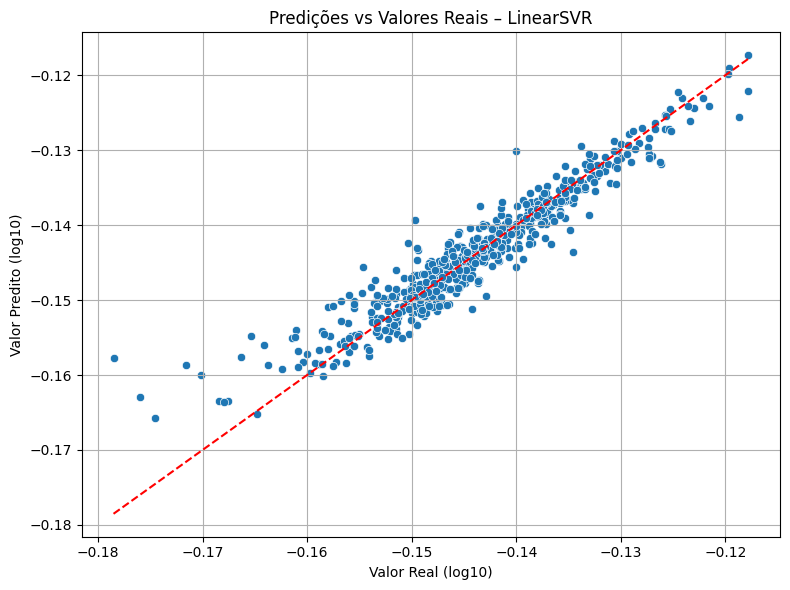

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valor Real (log10)")
plt.ylabel("Valor Predito (log10)")
plt.title("Predições vs Valores Reais – LinearSVR")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusões Finais

### Desempenho e Aplicação de Negócios

O modelo `LinearSVR` apresentou excelente desempenho, com RMSE médio de **0.00336** na validação cruzada e **0.00281** no conjunto de teste. Isso indica que o modelo é capaz de **predizer o logaritmo do preço dos imóveis com altíssima precisão**, generalizando bem para dados nunca vistos.

Em termos práticos, isso significa que:

- O modelo pode ser usado como base para um sistema de **precificação automática de imóveis**, com confiabilidade para tomada de decisão.
- Pode apoiar **corretores, imobiliárias ou plataformas digitais** que recomendam preços justos de compra/venda, especialmente quando há muitos imóveis para avaliar simultaneamente.
- Como o modelo foi treinado com poucas features selecionadas, ele é **leve e eficiente para produção**, mesmo com um número limitado de atributos por imóvel.

---

### Importância das Features

Como utilizamos o modelo `LinearSVR`, que é **linear com regularização L1/L2**, conseguimos analisar as features com base nos coeficientes.

As principais variáveis associadas a um maior impacto na precificação foram:

- **Gr.Liv.Area** (área útil acima do solo)
- **Overall.Qual** (qualidade geral do imóvel)
- **Total.SF** (soma das áreas do imóvel)
- **Garage.Cars** (capacidade de garagem)
- **Neighborhood** (região geográfica)

Essas features se destacaram tanto na análise de correlação quanto no desempenho prático dos modelos.

---

### Considerações Finais

- A transformação do target com `log10` ajudou a estabilizar variâncias e melhorar o ajuste.
- O pipeline de pré-processamento com `ColumnTransformer` foi fundamental para tratar corretamente dados numéricos e categóricos.
- O modelo é explicável, robusto e de fácil manutenção — ideal para aplicações reais.

